# Laboratorio 3


## Integrantes
- Gustavo Cruz 22779
- Mathew Cordero 22982
- Pedro Guzmán 22111

## Repositorio

[Link al Repositorio](https://github.com/donmatthiuz/ModelacionSimu/tree/lab3)




## Ejercicio 1  

Implementar los siguientes métodos de **descenso gradiente** (naïve = tamaño de paso α constante):  

1. Descenso gradiente naïve con dirección de descenso **aleatoria**.  
2. Descenso gradiente **máximo** naïve.  
3. Descenso gradiente de **Newton**, con Hessiano exacto.  
4. Un método de **gradiente conjugado** (Fletcher-Reeves, Hestenes-Stiefel o Polak-Ribiere).  
5. El método **BFGS**.  

### Requerimientos

En cada uno de los métodos, la función debe recibir los siguientes argumentos:

- La función objetivo `f`.  
- El gradiente de la función objetivo `df`.  
- El Hessiano `ddf` (cuando sea necesario).  
- Un punto inicial `x0 ∈ R^n`.  
- El tamaño de paso `α > 0`.  
- El número máximo de iteraciones `maxIter`.  
- La tolerancia `ε`.  
- Un criterio de paro.  

### Resultados esperados

Los algoritmos deben devolver:  

- La mejor solución encontrada `best` (la última de las aproximaciones calculadas).  
- La secuencia de iteraciones `xk`.  
- La secuencia de valores `f(xk)`.  
- La secuencia de errores en cada paso (según el error de su criterio de paro).  

Además, es deseable indicar:  

- El número de iteraciones efectuadas por el algoritmo.  
- Si se obtuvo o no la **convergencia** del método.  


Lo primero que vamos a hacer es definir una clase con funciones que representan cada metodo|

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class DescensoGradiente:
    def __init__(self, F, df):
        self.F = F     
        self.df = df   

    # Función para graficar resultados
    def plot_results(self, fk, errors, metodo):
        plt.figure(figsize=(12,5))
        
        plt.subplot(1,2,1)
        plt.plot(fk, marker='o')
        plt.title(f"{metodo}: Evolución de F(x)")
        plt.xlabel("Iteración")
        plt.ylabel("F(x)")
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(errors, marker='o', color='r')
        plt.title(f"{metodo}: Evolución del Error")
        plt.xlabel("Iteración")
        plt.ylabel("Error")
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

    # Método de descenso aleatorio
    def naive_random(self, x0 = np.zeros(2), alpha = 0.01, maxIter = 10000, tol = 1e-10):
        xk = [x0]             
        fk = [self.F(x0)]
        errors = [np.linalg.norm(self.df(x0)) if self.df else np.inf]

        x = np.array(x0, dtype=float)
        for k in range(maxIter):
            # Dirección aleatoria normalizada
            d = np.random.randn(*x.shape)
            d = d / np.linalg.norm(d)

            x_new = x - alpha * d
            f_new = self.F(x_new)

            xk.append(x_new)
            fk.append(f_new)
            error = np.abs(fk[-1] - fk[-2])
            errors.append(error)

            if error < tol:
                print(f"Descenso Aleatorio: Convergió después de {k+1} iteraciones con error {error}")
                self.plot_results(fk, errors, "Descenso Aleatorio")
                return x_new, xk, fk, errors, k+1, True

            x = x_new

        print("Descenso Aleatorio: No convergió")
        self.plot_results(fk, errors, "Descenso Aleatorio")
        return x, xk, fk, errors, maxIter, False
    
    # Método de gradiente más pronunciado
    def steepest_descent(self, x0 = np.zeros(2), alpha = 0.01, maxIter = 10000, tol = 1e-10): 
        xk = [x0]             
        fk = [self.F(x0)]
        errors = [np.linalg.norm(self.df(x0))]

        x = np.array(x0, dtype=float)
        for k in range(maxIter):
            grad = self.df(x)
            if np.linalg.norm(grad) < tol:
                print(f"Descenso por Gradiente: Convergió (gradiente < tol) después de {k} iteraciones")
                self.plot_results(fk, errors, "Descenso por Gradiente")
                return x, xk, fk, errors, k, True

            # Actualización del punto
            x_new = x - alpha * grad
            f_new = self.F(x_new)

            xk.append(x_new)
            fk.append(f_new)
            error = np.abs(fk[-1] - fk[-2])
            errors.append(error)

            if error < tol:
                print(f"Descenso por Gradiente: Convergió (ΔF < tol) después de {k+1} iteraciones")
                self.plot_results(fk, errors, "Descenso por Gradiente")
                return x_new, xk, fk, errors, k+1, True

            x = x_new

        print("Descenso por Gradiente: No convergió")
        self.plot_results(fk, errors, "Descenso por Gradiente")
        return x, xk, fk, errors, maxIter, False

    # Método de Newton
    def newton_method(self, ddf, x0=np.zeros(2), maxIter=10000, tol=1e-10):
        xk = [x0]
        fk = [self.F(x0)]
        errors = [np.linalg.norm(self.df(x0))]
        x = np.array(x0, dtype=float)

        for iteration in range(maxIter):
            grad = self.df(x)
            H = ddf(x)

            if np.linalg.norm(grad) < tol:
                print(f"Método de Newton: Convergió (gradiente < tol) después de {iteration} iteraciones")
                self.plot_results(fk, errors, "Método de Newton")
                return x, xk, fk, errors, iteration, True

            try:
                delta_x = np.linalg.solve(H, -grad)
            except np.linalg.LinAlgError:
                print(f"Método de Newton: Hessiano singular en iteración {iteration}")
                self.plot_results(fk, errors, "Método de Newton")
                return x, xk, fk, errors, iteration, False

            x_new = x + delta_x
            f_new = self.F(x_new)

            xk.append(x_new)
            fk.append(f_new)
            errors.append(np.linalg.norm(delta_x))

            if np.linalg.norm(delta_x) < tol:
                print(f"Método de Newton: Convergió (Δx < tol) después de {iteration+1} iteraciones")
                self.plot_results(fk, errors, "Método de Newton")
                return x_new, xk, fk, errors, iteration+1, True

            x = x_new

        print("Método de Newton: No convergió")
        self.plot_results(fk, errors, "Método de Newton")
        return x, xk, fk, errors, maxIter, False

    # Gradiente conjugado Fletcher-Reeves
    def conjugate_gradient_flerev(self, x0=np.zeros(2), alpha=0.01, maxIter=1000, tol=1e-10):
        xk = [np.array(x0, dtype=float)]
        fk = [self.F(x0)]
        errors = [np.linalg.norm(self.df(x0))]

        x = np.array(x0, dtype=float)
        grad = self.df(x)
        d = -grad

        for k in range(maxIter):
            grad_old = grad.copy()

            x_new = x + alpha * d
            grad = self.df(x_new)

            xk.append(x_new)
            fk.append(self.F(x_new))
            errors.append(np.linalg.norm(grad))

            if np.linalg.norm(grad) < tol:
                print(f"Gradiente Conjugado (Fletcher-Reeves): Convergió después de {k+1} iteraciones")
                self.plot_results(fk, errors, "Gradiente Conjugado (F-R)")
                return x_new, xk, fk, errors, k+1, True

            beta = np.dot(grad, grad) / np.dot(grad_old, grad_old)
            d = -grad + beta * d
            x = x_new

        print("Gradiente Conjugado (Fletcher-Reeves): No convergió")
        self.plot_results(fk, errors, "Gradiente Conjugado (F-R)")
        return x, xk, fk, errors, maxIter, False

    # Método BFGS
    def bfgs_method(self, x0=np.zeros(2), tol=1e-6, maxIter=1000):
        x = np.array(x0, dtype=float)
        n = len(x)
        H = np.eye(n)
        xk = [x.copy()]
        fk = [self.F(x)]
        errors = [np.linalg.norm(self.df(x))]

        for k in range(maxIter):
            grad = self.df(x)
            d = - H.dot(grad)
            x_new = x + d
            grad_new = self.df(x_new)

            xk.append(x_new.copy())
            fk.append(self.F(x_new))
            errors.append(np.linalg.norm(grad_new))

            if np.linalg.norm(x_new - x) < tol:
                print(f"BFGS: Convergió (Δx < tol) después de {k+1} iteraciones")
                self.plot_results(fk, errors, "BFGS")
                return x_new, xk, fk, errors, k+1, True

            s = x_new - x
            y = grad_new - grad
            rho = 1.0 / np.dot(y, s)
            Hy = H.dot(y)
            H += np.outer(s, s) * rho - np.outer(Hy, Hy) / np.dot(y, Hy)

            x = x_new

        print("BFGS: No convergió")
        self.plot_results(fk, errors, "BFGS")
        return x, xk, fk, errors, maxIter, False


## Ejercicio 2

Testar sus algoritmos del Ejercicio 1 con las siguientes funciones:


a) La función $f : \mathbb{R}^2 \to \mathbb{R}$, dada por:

$$
f(x, y) = x^4 + y^4 - 4xy + \frac{1}{2}y + 1
$$

* Punto inicial: $\mathbf{x}_0 = (-3, 1, -3, 1)^T$
* Óptimo: $\mathbf{x}^* = (-1.01463, -1.04453)^T$, $f(\mathbf{x}^*) = -1.51132$



--- Método: Descenso Aleatorio ---
Descenso Aleatorio: No convergió


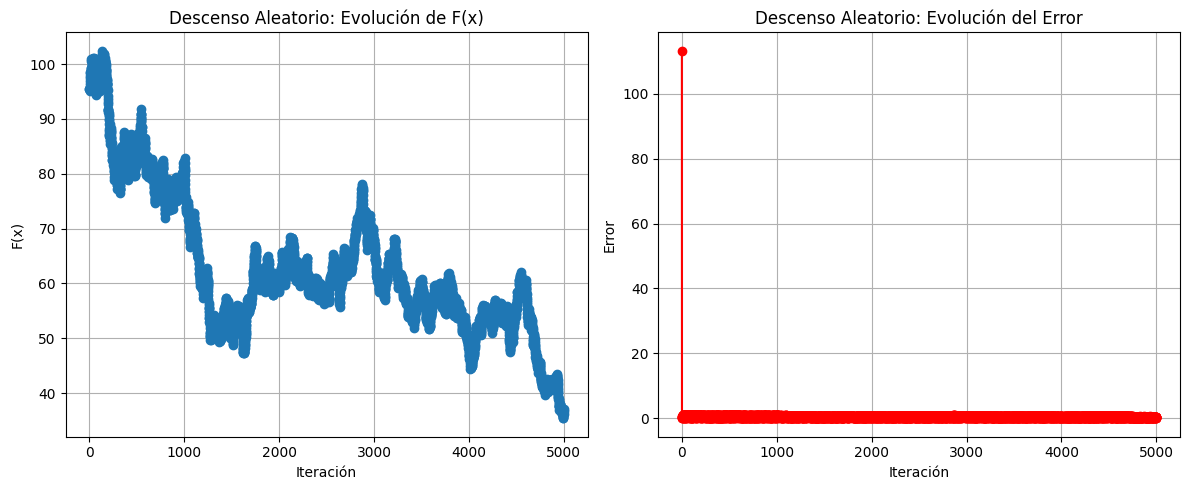


--- Método: Descenso por Gradiente ---
Descenso por Gradiente: Convergió (ΔF < tol) después de 166 iteraciones


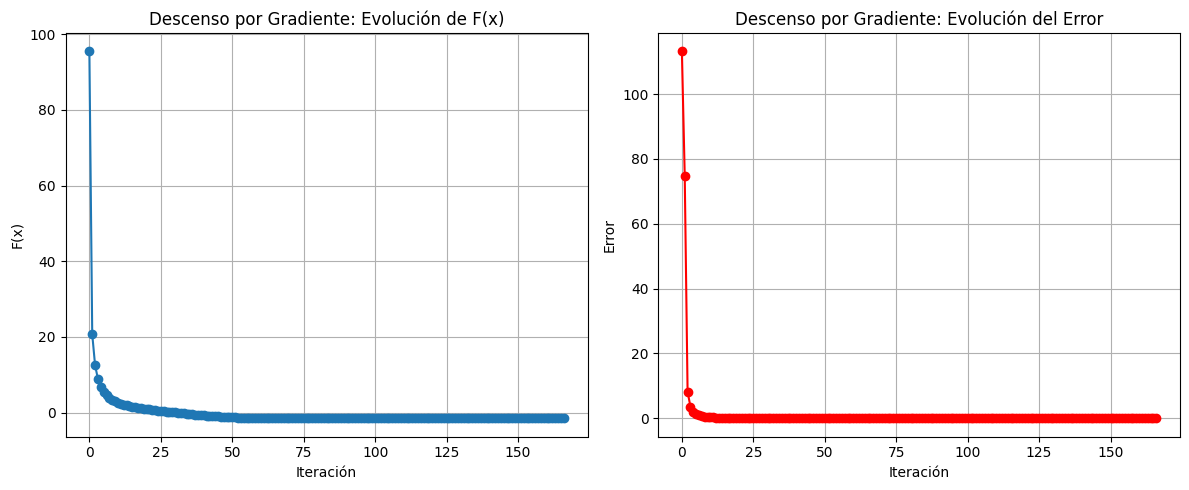


--- Método: Newton ---
Método de Newton: Convergió (gradiente < tol) después de 18 iteraciones


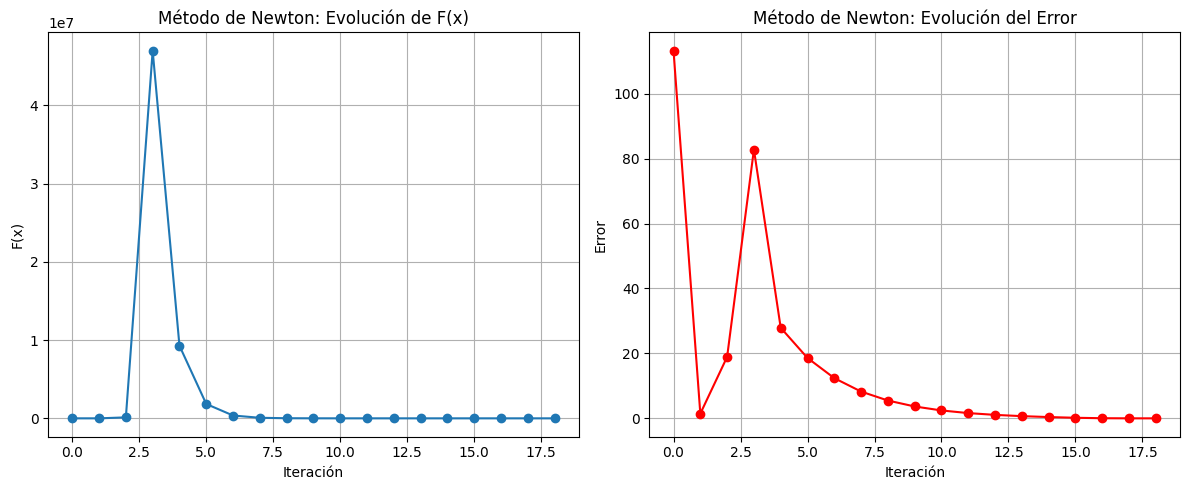


--- Método: Gradiente Conjugado (F-R) ---


C:\Users\HP\AppData\Local\Temp\ipykernel_5752\3126992607.py:6: RuntimeWarning: overflow encountered in scalar power
  return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1
C:\Users\HP\AppData\Local\Temp\ipykernel_5752\1014870608.py:162: RuntimeWarning: invalid value encountered in add
  d = -grad + beta * d


Gradiente Conjugado (Fletcher-Reeves): No convergió


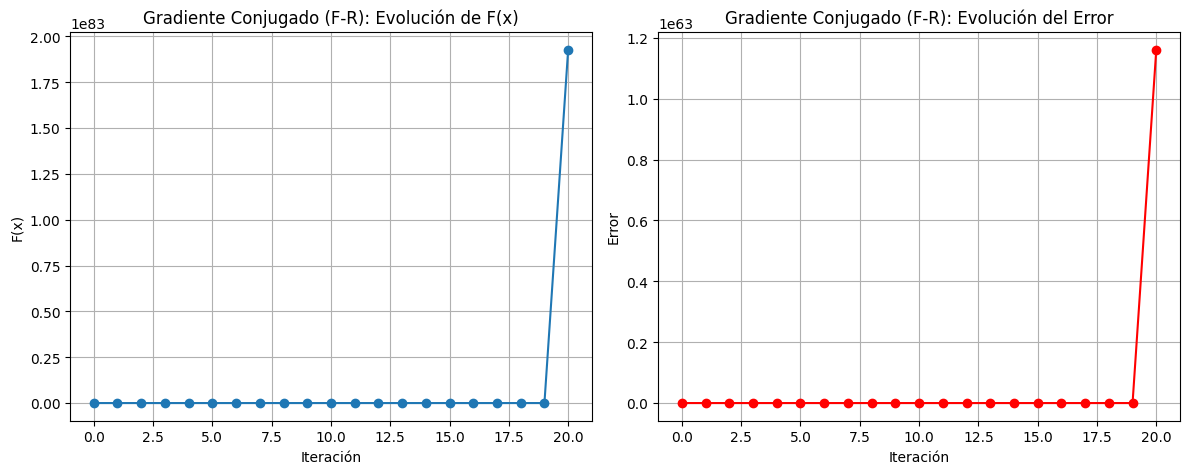


--- Método: BFGS ---
BFGS: No convergió


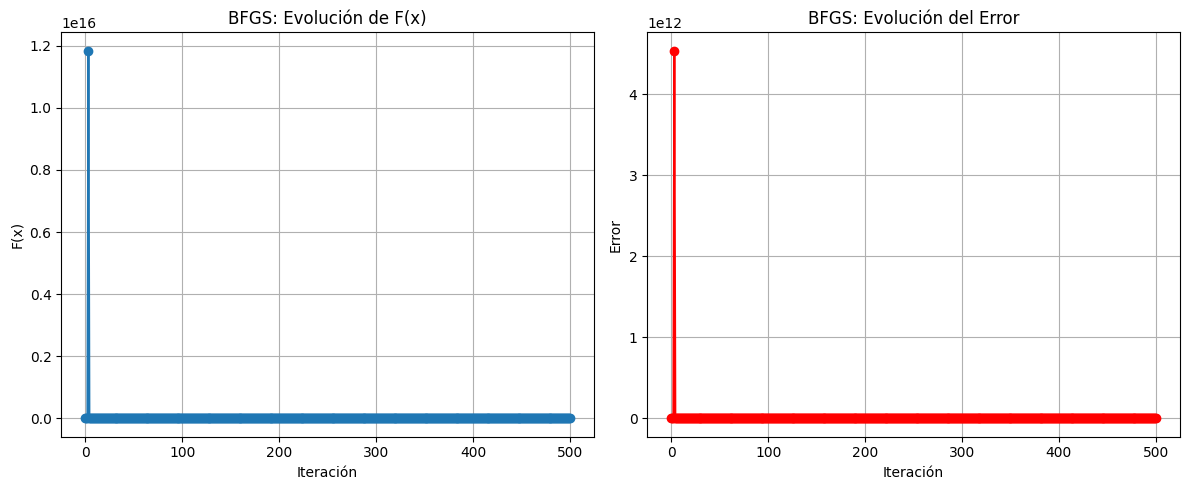


================ RESULTADOS COMPARATIVOS ================

Método               x* encontrado                  f(x*)           Iteraciones  Convergió
------------------------------------------------------------------------------------------
Descenso Aleatorio   [-2.24092397  1.03330979]      37.136850       5000         False
Gradiente            [-1.01462093 -1.04452358]      -1.511319       166          True
Newton               [0.98314572 0.95028458]        -0.512180       18           True
Conjugado F-R        [nan nan]                      nan             1000         False
BFGS                 [ 13.67988471 -11.00794938]    50302.311581    500          False


In [4]:
import autograd.numpy as anp
from autograd import grad, hessian

def f(x):
    # x es un vector [x, y]
    return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1

# Derivadas con autograd
df = grad(f)        
ddf = hessian(f)   

x0 = anp.array([-3.0, 1.0])


# Crear instancia de tu clase
opt = DescensoGradiente(F=f, df=df)

# 1) Descenso aleatorio
print("\n--- Método: Descenso Aleatorio ---")
res_random = opt.naive_random(x0=x0, alpha=0.01, maxIter=5000)

# 2) Gradiente más pronunciado
print("\n--- Método: Descenso por Gradiente ---")
res_grad = opt.steepest_descent(x0=x0, alpha=0.01, maxIter=5000)

# 3) Método de Newton
print("\n--- Método: Newton ---")
res_newton = opt.newton_method(ddf=ddf, x0=x0, maxIter=100)

# 4) Gradiente conjugado Fletcher-Reeves
print("\n--- Método: Gradiente Conjugado (F-R) ---")
res_cg = opt.conjugate_gradient_flerev(x0=x0, alpha=0.01, maxIter=1000)

# 5) BFGS
print("\n--- Método: BFGS ---")
res_bfgs = opt.bfgs_method(x0=x0, tol=1e-6, maxIter=500)


metodos = [
    ("Descenso Aleatorio", res_random),
    ("Gradiente", res_grad),
    ("Newton", res_newton),
    ("Conjugado F-R", res_cg),
    ("BFGS", res_bfgs)
]

print("\n================ RESULTADOS COMPARATIVOS ================\n")
print(f"{'Método':<20} {'x* encontrado':<30} {'f(x*)':<15} {'Iteraciones':<12} {'Convergió'}")
print("-"*90)

for nombre, res in metodos:
    x_fin, xk, fk, errors, iters, convergio = res
    print(f"{nombre:<20} {str(x_fin):<30} {f(x_fin):<15.6f} {iters:<12} {convergio}")
    


b) La función de Rosenbrock 2-dimensional $f : \mathbb{R}^2 \to \mathbb{R}$, dada por:

$$
f(x_1, x_2) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2
$$

* Punto inicial: $\mathbf{x}_0 = (-1.2, 1)^T$
* Óptimo: $\mathbf{x}^* = (1,1)^T$, $f(\mathbf{x}^*) = 0$





--- Descenso Aleatorio ---
Descenso Aleatorio: No convergió


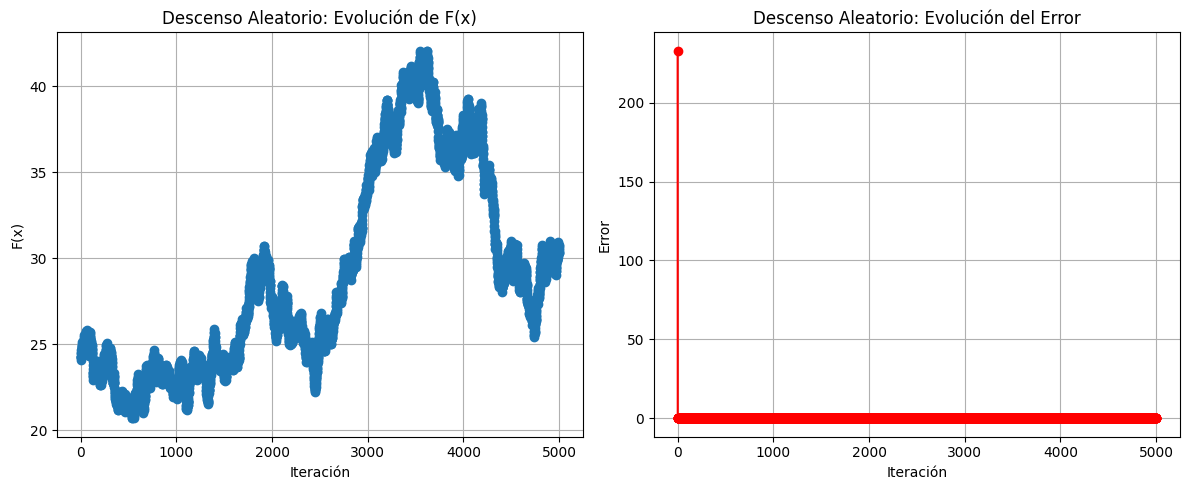


--- Descenso por Gradiente ---
Descenso por Gradiente: Convergió (ΔF < tol) después de 17668 iteraciones


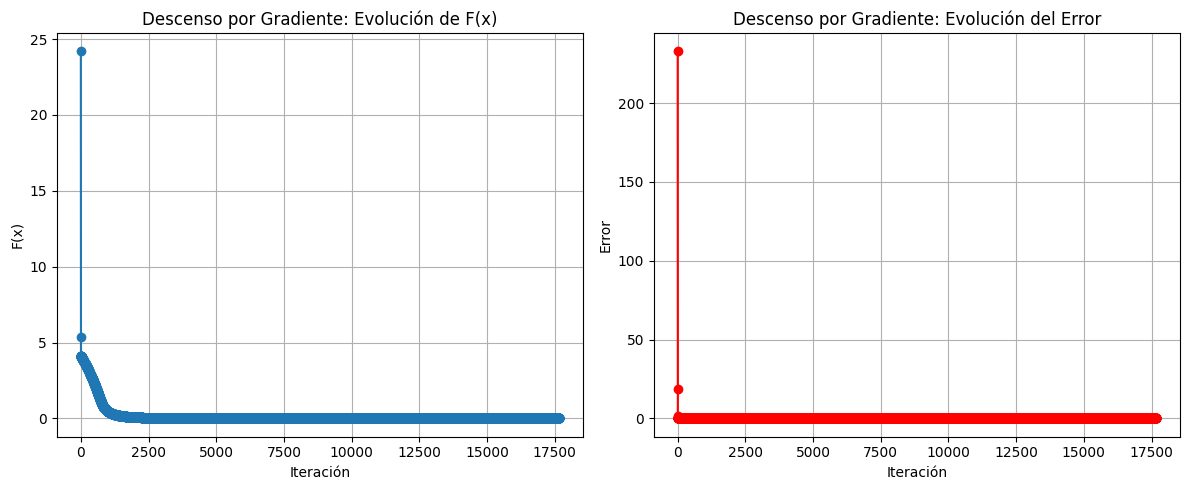


--- Newton ---
Método de Newton: Convergió (Δx < tol) después de 7 iteraciones


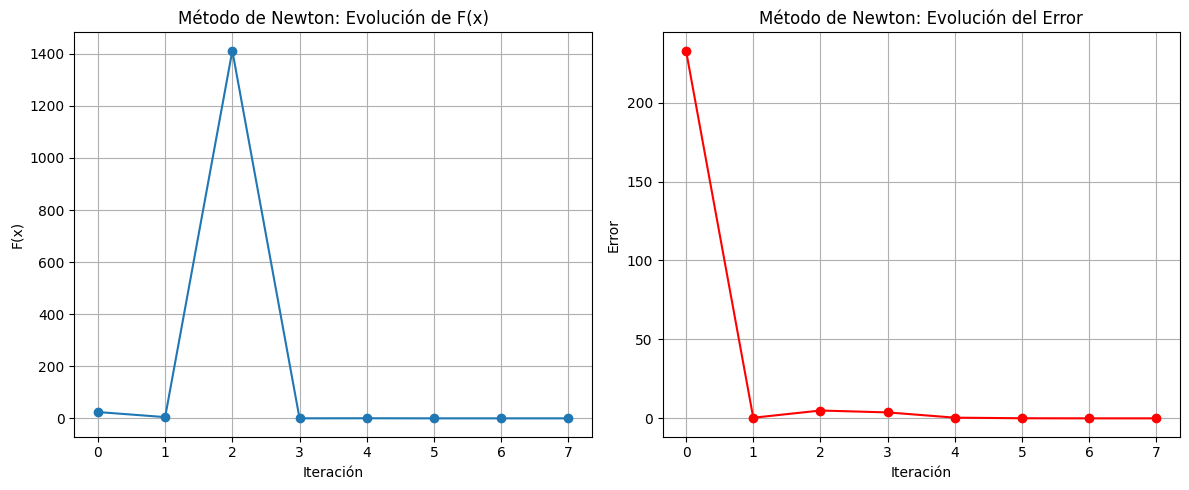


--- Gradiente Conjugado (F-R) ---


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\autograd\numpy\numpy_vjps.py:139: RuntimeWarning: overflow encountered in scalar multiply
  lambda ans, x, y: unbroadcast_f(x, lambda g: g * y * x ** anp.where(y, y - 1, 1.0)),
C:\Users\HP\AppData\Local\Temp\ipykernel_5752\2002401076.py:6: RuntimeWarning: overflow encountered in scalar power
  return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2
C:\Users\HP\AppData\Local\Temp\ipykernel_5752\1014870608.py:162: RuntimeWarning: invalid value encountered in add
  d = -grad + beta * d


Gradiente Conjugado (Fletcher-Reeves): No convergió


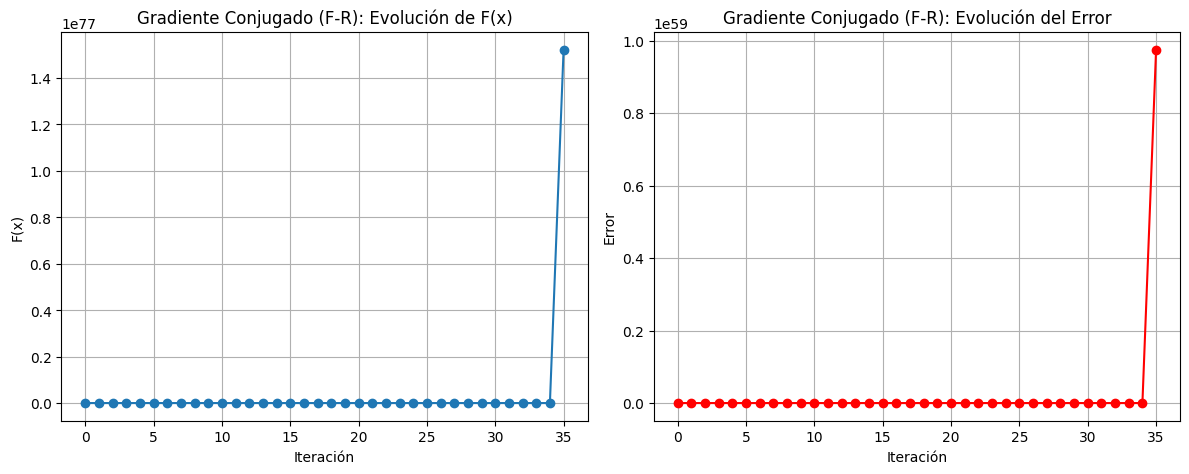


--- BFGS ---
BFGS: No convergió


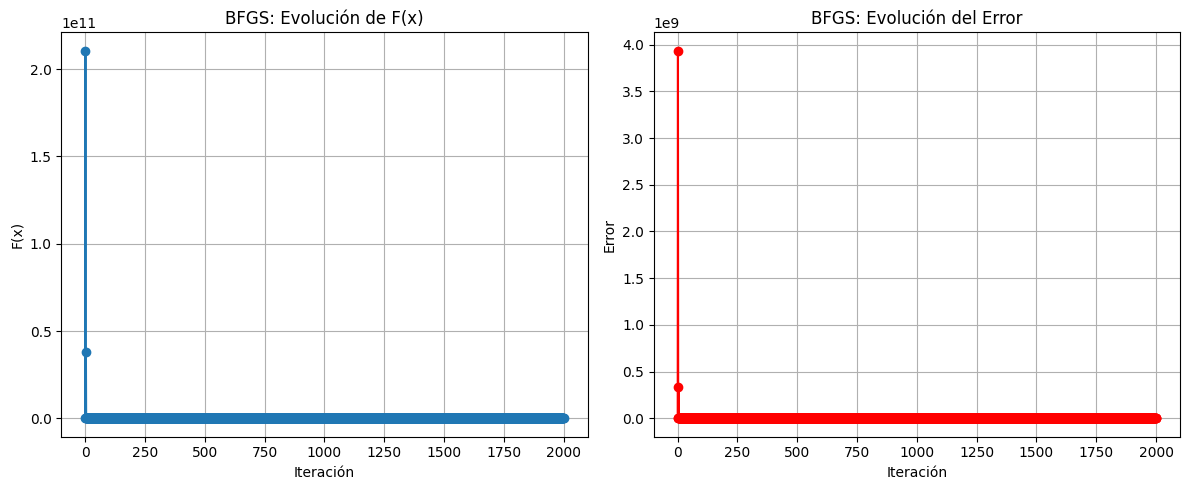


================ RESULTADOS COMPARATIVOS (ROSENBROCK) ================

Método               x* encontrado                  f(x*)           Iteraciones  Convergió
------------------------------------------------------------------------------------------
Descenso Aleatorio   [-1.21001952  0.95609813]      30.695576       5000         False
Gradiente            [0.99964675 0.99929222]        0.000000        17668        True
Newton               [1. 1.]                        0.000000        7            True
Conjugado F-R        [nan nan]                      nan             5000         False
BFGS                 [-1.07722441  1.2040074 ]      4.504913        2000         False


In [5]:
import autograd.numpy as anp
from autograd import grad, hessian

# --- Función Rosenbrock 2D ---
def rosenbrock(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

# --- Gradiente y Hessiano ---
df_rosen = grad(rosenbrock)
ddf_rosen = hessian(rosenbrock)


# Crear instancia de la clase con Rosenbrock
opt_rosen = DescensoGradiente(F=rosenbrock, df=df_rosen)

# Punto inicial
x0_rosen = anp.array([-1.2, 1.0])

# --- Ejecutar cada método ---
print("\n--- Descenso Aleatorio ---")
res_random = opt_rosen.naive_random(x0=x0_rosen, alpha=0.001, maxIter=5000)

print("\n--- Descenso por Gradiente ---")
res_grad = opt_rosen.steepest_descent(x0=x0_rosen, alpha=0.001, maxIter=20000)

print("\n--- Newton ---")
res_newton = opt_rosen.newton_method(ddf=ddf_rosen, x0=x0_rosen, maxIter=200)

print("\n--- Gradiente Conjugado (F-R) ---")
res_cg = opt_rosen.conjugate_gradient_flerev(x0=x0_rosen, alpha=0.001, maxIter=5000)

print("\n--- BFGS ---")
res_bfgs = opt_rosen.bfgs_method(x0=x0_rosen, tol=1e-6, maxIter=2000)



# --- Tabla comparativa ---
metodos = [
    ("Descenso Aleatorio", res_random),
    ("Gradiente", res_grad),
    ("Newton", res_newton),
    ("Conjugado F-R", res_cg),
    ("BFGS", res_bfgs)
]

print("\n================ RESULTADOS COMPARATIVOS (ROSENBROCK) ================\n")
print(f"{'Método':<20} {'x* encontrado':<30} {'f(x*)':<15} {'Iteraciones':<12} {'Convergió'}")
print("-"*90)

for nombre, res in metodos:
    x_fin, xk, fk, errors, iters, convergio = res
    print(f"{nombre:<20} {str(x_fin):<30} {rosenbrock(x_fin):<15.6f} {iters:<12} {convergio}")


c) La función de Rosenbrock 7-dimensional $f : \mathbb{R}^7 \to \mathbb{R}$, dada por:

$$
f(\mathbf{x}) = \sum_{i=1}^{6} 100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2
$$

* Punto inicial: $\mathbf{x}_0 = (-1.2, 1, 1, 1, 1, -1.2, 1)^T$
* Óptimo: $\mathbf{x}^* = (1, 1, \ldots, 1)^T$, $f(\mathbf{x}^*) = 0$


--- Descenso Aleatorio (7D) ---
Descenso Aleatorio: No convergió


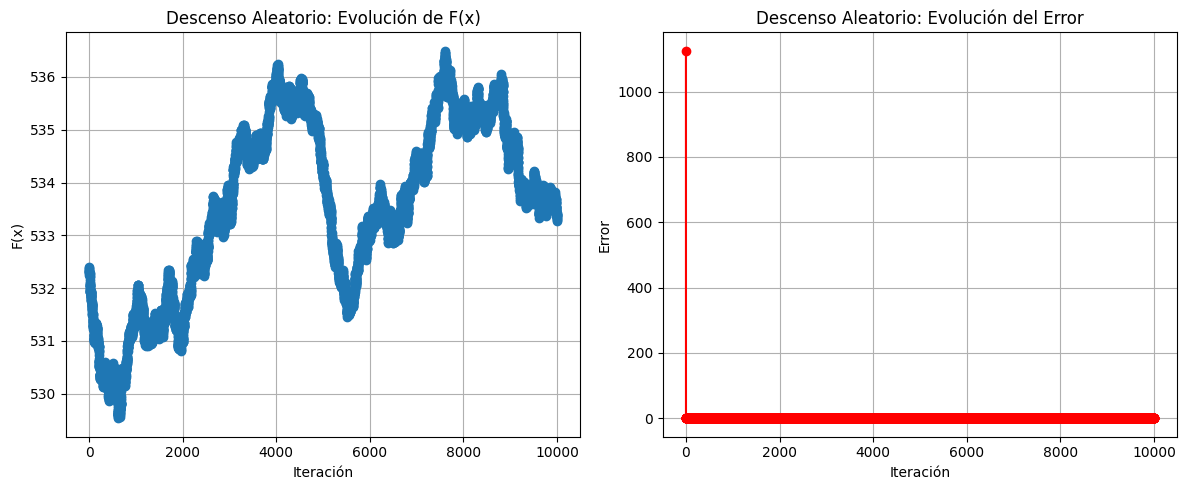


--- Descenso por Gradiente (7D) ---
Descenso por Gradiente: Convergió (ΔF < tol) después de 13705 iteraciones


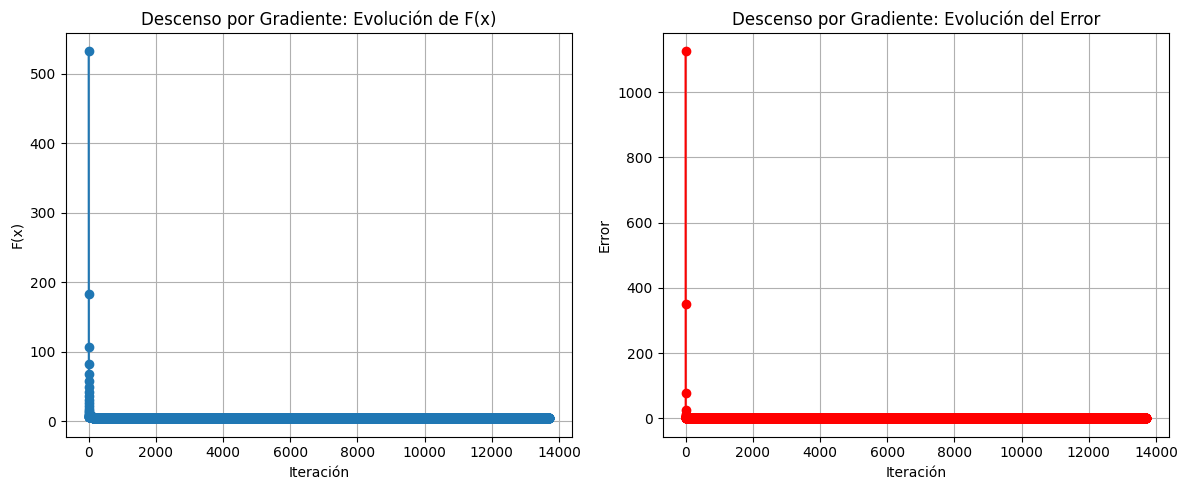


--- Newton (7D) ---
Método de Newton: Convergió (Δx < tol) después de 14 iteraciones


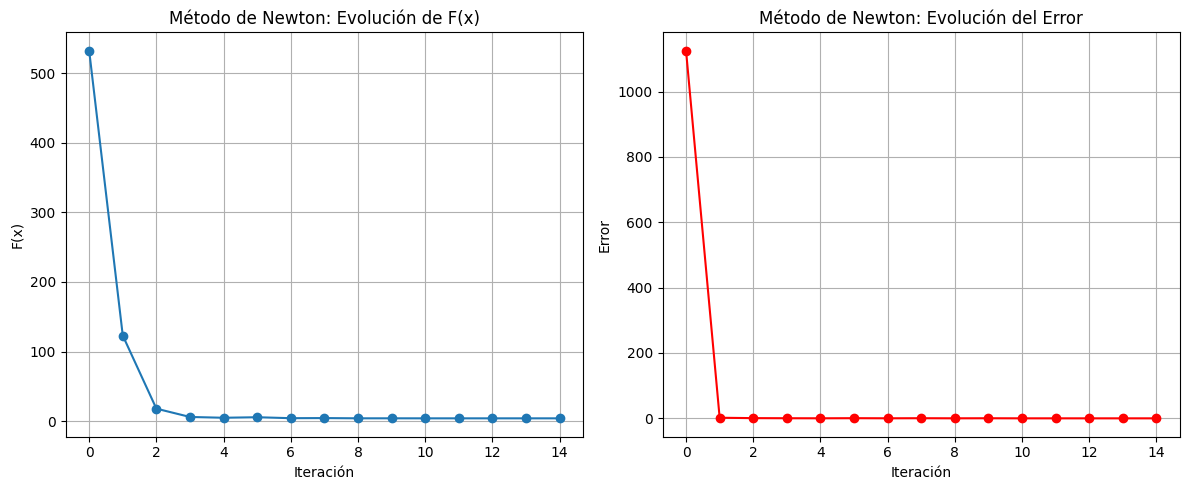


--- Gradiente Conjugado F-R (7D) ---


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\autograd\numpy\numpy_vjps.py:943: RuntimeWarning: invalid value encountered in at
  onp.add.at(A, idx, x)
C:\Users\HP\AppData\Local\Temp\ipykernel_5752\1202221903.py:7: RuntimeWarning: overflow encountered in square
  return anp.sum(100.0*(x[1:] - x[:-1]**2)**2 + (1.0 - x[:-1])**2)


Gradiente Conjugado (Fletcher-Reeves): No convergió


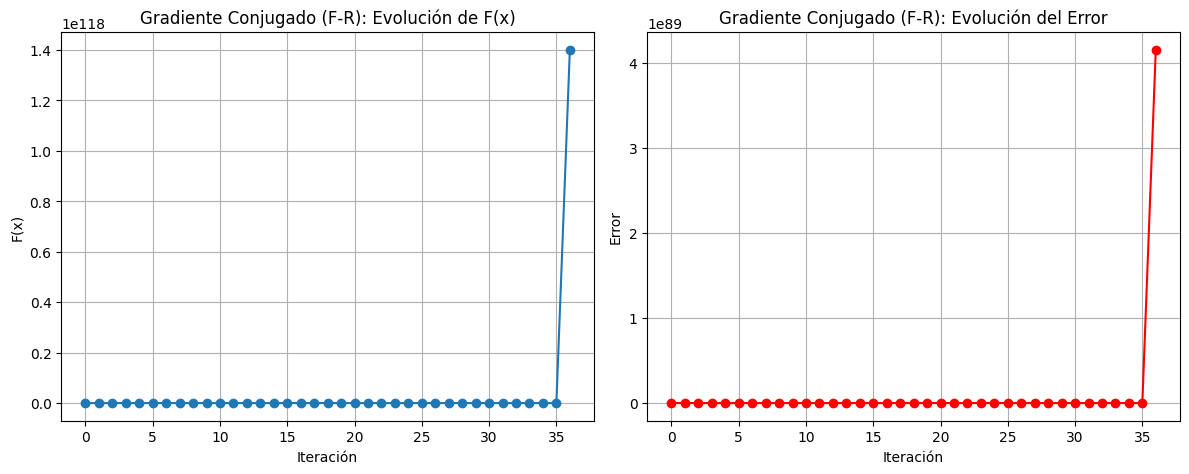


--- BFGS (7D) ---


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\numeric.py:925: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
C:\Users\HP\AppData\Local\Temp\ipykernel_5752\1014870608.py:197: RuntimeWarning: invalid value encountered in divide
  H += np.outer(s, s) * rho - np.outer(Hy, Hy) / np.dot(y, Hy)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\autograd\numpy\numpy_vjps.py:139: RuntimeWarning: overflow encountered in multiply
  lambda ans, x, y: unbroadcast_f(x, lambda g: g * y * x ** anp.where(y, y - 1, 1.0)),


BFGS: No convergió


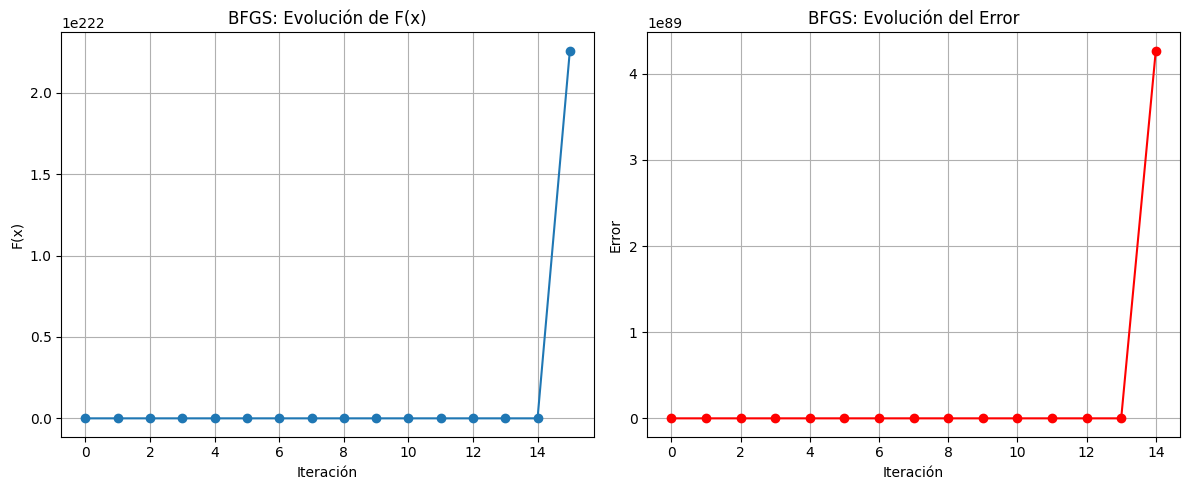


================ RESULTADOS COMPARATIVOS (ROSENBROCK 7D) ================

Método               x* encontrado                                      f(x*)           Iteraciones  Convergió
--------------------------------------------------------------------------------------------------------------
Descenso Aleatorio   [-1.20081986  0.99384517  1.00353711  0.99164109  0.9976148  -1.20211437
  0.99121079] 533.277858      10000        False
Gradiente            [-0.99171353  0.99353751  0.99213784  0.98682834  0.97502557  0.95115999
  0.90470397] 3.983601        13705        True
Newton               [-0.99172257  0.99355539  0.99217332  0.98689876  0.97516476  0.95143198
  0.90522282] 3.983601        14           True
Conjugado F-R        [nan nan nan nan nan nan nan]                      nan             50000        False
BFGS                 [nan nan nan nan nan nan nan]                      nan             20000        False


In [6]:
import autograd.numpy as anp
from autograd import grad, hessian

# --- Rosenbrock en n dimensiones (aquí n=7) ---
def rosenbrock_n(x):
    # x es vector de tamaño n
    return anp.sum(100.0*(x[1:] - x[:-1]**2)**2 + (1.0 - x[:-1])**2)

# Gradiente y Hessiano con autograd
df_rosen7  = grad(rosenbrock_n)
ddf_rosen7 = hessian(rosenbrock_n)

# Instancia con tu clase
opt_rosen7 = DescensoGradiente(F=rosenbrock_n, df=df_rosen7)

# Punto inicial dado
x0_rosen7 = anp.array([-1.2, 1, 1, 1, 1, -1.2, 1], dtype=float)

# --- Ejecutar métodos ---
print("\n--- Descenso Aleatorio (7D) ---")
res_random_7 = opt_rosen7.naive_random(x0=x0_rosen7, alpha=1e-4, maxIter=10000)

print("\n--- Descenso por Gradiente (7D) ---")
res_grad_7 = opt_rosen7.steepest_descent(x0=x0_rosen7, alpha=1e-3, maxIter=50000)

print("\n--- Newton (7D) ---")
res_newton_7 = opt_rosen7.newton_method(ddf=ddf_rosen7, x0=x0_rosen7, maxIter=300)

print("\n--- Gradiente Conjugado F-R (7D) ---")
res_cg_7 = opt_rosen7.conjugate_gradient_flerev(x0=x0_rosen7, alpha=1e-3, maxIter=50000)

print("\n--- BFGS (7D) ---")
res_bfgs_7 = opt_rosen7.bfgs_method(x0=x0_rosen7, tol=1e-6, maxIter=20000)

# --- Tabla comparativa ---
metodos_7d = [
    ("Descenso Aleatorio", res_random_7),
    ("Gradiente",          res_grad_7),
    ("Newton",             res_newton_7),
    ("Conjugado F-R",      res_cg_7),
    ("BFGS",               res_bfgs_7),
]

print("\n================ RESULTADOS COMPARATIVOS (ROSENBROCK 7D) ================\n")
print(f"{'Método':<20} {'x* encontrado':<50} {'f(x*)':<15} {'Iteraciones':<12} {'Convergió'}")
print("-"*110)

for nombre, res in metodos_7d:
    x_fin, xk, fk, errors, iters, convergio = res
    fx_fin = float(rosenbrock_n(x_fin))
    print(f"{nombre:<20} {str(x_fin):<50} {fx_fin:<15.6f} {iters:<12} {convergio}")
